  # Exploring Statistical Methods on **PRE-CLEANED** bigram frequencies

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import statistics as stat

import numpy as np
from math import sqrt

# _LSC_DATA_DIR = Path("/share/compling/projects/sanpi/source/LSC/data")
orig_frq = None

## Load cleaned & limited frequency table

In [139]:

if orig_frq is not None:
    frq_table = orig_frq
else:
    input_csv = Path(
        '/share/compling/projects/sanpi/results/freq_out/all-frq_thresh877.35f.csv')
    frq_table = pd.read_csv(input_csv)

    if 'adv_lemma' in frq_table.columns:
        frq_table = frq_table.set_index('adv_lemma').transpose()
    if frq_table.index.name != 'adj_lemma':
        if 'adj_lemma' in frq_table.columns:
            frq_table = frq_table.set_index('adj_lemma')
        else:
            frq_table.index.name = 'adj_lemma'
    frq_table = frq_table.apply(pd.to_numeric, downcast='unsigned')
    frq_table.columns.name = 'adv_lemma'
    frq_table.columns = frq_table.columns.astype('string')
    if 'SUM' in frq_table.index:
        SUM_row = frq_table.loc['SUM', :]
    if 'SUM' in frq_table.columns:
        SUM_col = frq_table.loc[:, 'SUM']
    frq_table = frq_table.loc[frq_table.index !=
                              'SUM', frq_table.columns != 'SUM']
    print(frq_table.shape[0], 'rows (adj)')
    print(frq_table.shape[1], 'columns (adv)')
    frq_table.index = frq_table.index.astype('string')
    orig_frq = frq_table.copy()
frq_table

3829 rows (adj)
1021 columns (adv)


adv_lemma,very,more,most,so,not,as,too,really,much,pretty,...,resoundingly,athletically,questionably,inescapably,slyly,second-most,bracingly,deservedly,scandalously,urgently
adj_lemma,,,,,,,,,,,,,,,,,,,,,
good,644398,21021,5880,149256,142461,248773,58563,259683,286470,241515,...,12,4,10,1,4,0,2,5,10,2
many,21205,373,140,1191059,58394,434207,448976,517,214,54,...,0,0,1,0,0,0,0,0,0,0
important,356900,305891,746782,104663,24149,102784,12806,71718,1828,6584,...,0,1,3,5,0,112,0,0,0,120
much,42027,102,22,613054,79899,355270,579790,3063,289,57797,...,0,0,0,0,0,0,0,0,0,0
likely,35628,498300,191813,847,63068,31826,1191,467,526,1312,...,0,0,0,0,0,14,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
directional,93,222,52,8,36,6,12,3,2,6,...,0,0,0,0,0,0,0,0,0,0
anti-democratic,24,21,69,10,23,16,2,4,0,3,...,0,0,0,0,0,0,0,0,0,0
panicked,54,159,31,94,8,28,65,16,3,15,...,0,0,0,0,0,0,0,0,0,0


In [140]:
frq_raw = frq_table.copy()

In [141]:
def _enhance_descrip(df: pd.DataFrame) -> pd.DataFrame:
    df = df
    desc = df.describe().transpose()
    desc = desc.assign(total=pd.to_numeric(df.sum()),
                       var_coeff=desc['std'] / desc['mean'],
                       range=desc['max'] - desc['min'],
                       IQ_range=desc['75%'] - desc['25%'])
    desc = desc.assign(upper_fence=desc['75%'] + (desc.IQ_range * 1.5),
                       lower_fence=desc['25%'] - (desc.IQ_range * 1.5))
    if 'SUM' not in desc.index:
        desc = desc.assign(
            plus1_geo_mean=df.add(1).apply(stat.geometric_mean),
            plus1_har_mean=df.add(1).apply(stat.harmonic_mean))
    for col in desc.columns:
        if col in ('mean', 'std', 'variance', 'var_coeff'):
            desc.loc[:, col] = desc[col].round(1)
        else:
            desc.loc[:, col] = pd.to_numeric(desc[col], downcast='unsigned')

    # mean_centr = no_sum_frame - no_sum_frame.mean()
    # mean_stand = no_sum_frame / no_sum_frame.mean()
    # mean_stand_centr = mean_stand - mean_stand.mean()
    # log2_trans = no_sum_frame.apply(np.log2)
    # log2_plus1_trans = no_sum_frame.add(1).apply(np.log2)
    # logn_plus1_trans = no_sum_frame.apply(np.log1p)

    return desc.round(1)

_enhance_descrip(frq_table)

,count,mean,std,min,25%,50%,75%,max,total,var_coeff,range,IQ_range,upper_fence,lower_fence,plus1_geo_mean,plus1_har_mean
adv_lemma,,,,,,,,,,,,,,,,
very,3829,2573.1,16558.3,0,45,159,692,644398,9852527,6.4,644398,647,1662.5,-925.5,175.3,19.4
more,3829,2432.1,12768.5,0,109,328,1127,498300,9312577,5.2,498300,1018,2654.0,-1418.0,363.8,62.4
most,3829,1967.9,16919.4,0,40,151,604,746782,7535166,8.6,746782,564,1450.0,-806.0,162.0,22.8
so,3829,1489.3,22258.6,0,34,115,387,1191059,5702512,14.9,1191059,353,916.5,-495.5,119.5,20.1
not,3829,1442.8,12278.2,0,25,85,327,548852,5524301,8.5,548852,302,780.0,-428.0,95.2,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
second-most,3829,0.2,4.1,0,0,0,0,163,885,17.8,163,0,0.0,0.0,1.0,1.0
bracingly,3829,0.2,1.8,0,0,0,0,70,884,7.8,70,0,0.0,0.0,1.1,1.1
deservedly,3829,0.2,3.9,0,0,0,0,192,881,17.0,192,0,0.0,0.0,1.1,1.0


## Transform Raw Counts

### Define transformation function

In [142]:
def transform_counts(df: pd.DataFrame,
                     method: str = 'sqrt', 
                     plus1: bool = False):
    if plus1 or method.startswith('log'):
        df = df.add(1)
    if method == 'sqrt':
        df = df.apply(lambda x: x.apply(sqrt))
    elif method == 'log10':
        df = df.apply(lambda x: x.apply(np.log10))
    elif method == 'log2':
        df = df.apply(lambda x: x.apply(np.log2))
    return df

### Define visualization functions

In [143]:

def heatmap(df, columns=None, save_name=None, size=(8, 10)):

    plt.figure(figsize=size, dpi=120, facecolor="white")

    adv_labels = df.index
    if columns:
        df = df.loc[:, columns]
    df = df.astype('float')
    # Displaying dataframe as an heatmap
    # with diverging colourmap as RdYlBu
    plt.imshow(df, cmap="plasma")
    # plt.imshow(df, cmap="gist_rainbow")
    # plt.imshow(df, cmap="jet")
    # plt.imshow(df, cmap="viridis")
    # plt.autoscale(enable=True, axis='both')
    # Displaying a color bar to understand
    # which color represents which range of data
    plt.colorbar()
    # Assigning labels of x-axis
    # according to dataframe
    plt.xticks(range(len(df.columns)), df.columns, rotation=-20)
    # Assigning labels of y-axis
    # according to dataframe
    plt.yticks(range(len(df.index)), adv_labels)
    # Displaying the figure
    plt.show()
    
    
def sample_counts(frq_table, label, 
                  rows=pd.Series(dtype='string'), 
                  columns=pd.Series(dtype='string')):
    color = 'gist_rainbow'
    s = frq_table.iloc[:int(frq_table.shape[0]/4), :int(frq_table.shape[1]/3)]

    rows = rows if any(rows) else s.sample(16).index
    columns = columns if any(columns) else s.T.sample(8).index
    sample_df = s.loc[rows, columns]
    # print(sample_df.describe().T.round(2).to_markdown())
    # fig = plt.figure(figsize=(6, 8), dpi=300)
    fig = plt.figure(dpi=130)
    # ax.barh(s20x10, width=1)
    sample_df.plot(kind='barh',
                   width=0.8,
                   figsize=(8, 10),
                   position=1,
                   title=f'{label} of sample',
                   grid=True,
                    colormap=color,
                    # colormap="gist_rainbow",
                    # colormap="rainbow",
                   #  colormap="brg",
                    #   colormap="nipy_spectral_r",
                #    colormap="Set1",
                   ax=plt.gca())
    plt.show()
    fig = plt.figure(dpi=150)
    sample_df.plot(kind='barh',
                   stacked=True,
                   width=0.8,
                   figsize=(8, 10),
                   position=1,
                   title=f'{label} of sample',
                   grid=True,
                   colormap=color,
                    # colormap="gist_rainbow",
                   #  colormap="brg",
                   #    colormap="nipy_spectral_r",
                #    colormap="Set1",
                   ax=plt.gca()
                   )
    plt.show()
    heatmap(sample_df, size=(8, 10))
    # print(sample_df.round().to_markdown(floatfmt=',.0f'))

    return s, sample_df

### Square-Root
 Square-root transformations are commonly used for counts data, since it is not affected by zeros.

In [144]:
frq0_sqrt = transform_counts(frq_table)
frq0_sqrt.round(1)

adv_lemma,very,more,most,so,not,as,too,really,much,pretty,...,resoundingly,athletically,questionably,inescapably,slyly,second-most,bracingly,deservedly,scandalously,urgently
adj_lemma,,,,,,,,,,,,,,,,,,,,,
good,802.7,145.0,76.7,386.3,377.4,498.8,242.0,509.6,535.2,491.4,...,3.5,2.0,3.2,1.0,2.0,0.0,1.4,2.2,3.2,1.4
many,145.6,19.3,11.8,1091.4,241.6,658.9,670.1,22.7,14.6,7.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
important,597.4,553.1,864.2,323.5,155.4,320.6,113.2,267.8,42.8,81.1,...,0.0,1.0,1.7,2.2,0.0,10.6,0.0,0.0,0.0,11.0
much,205.0,10.1,4.7,783.0,282.7,596.0,761.4,55.3,17.0,240.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
likely,188.8,705.9,438.0,29.1,251.1,178.4,34.5,21.6,22.9,36.2,...,0.0,0.0,0.0,0.0,0.0,3.7,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
directional,9.6,14.9,7.2,2.8,6.0,2.4,3.5,1.7,1.4,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anti-democratic,4.9,4.6,8.3,3.2,4.8,4.0,1.4,2.0,0.0,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
panicked,7.3,12.6,5.6,9.7,2.8,5.3,8.1,4.0,1.7,3.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
_enhance_descrip(frq0_sqrt)

,count,mean,std,min,25%,50%,75%,max,total,var_coeff,range,IQ_range,upper_fence,lower_fence,plus1_geo_mean,plus1_har_mean
adv_lemma,,,,,,,,,,,,,,,,
very,3829,25.6,43.8,0,6.7,12.6,26.3,802.7,98088.7,1.7,802.7,19.6,55.7,-22.7,14.5,8.4
more,3829,30.0,39.1,0,10.4,18.1,33.6,705.9,114974.9,1.3,705.9,23.1,68.3,-24.3,20.4,14.0
most,3829,22.7,38.1,0,6.3,12.3,24.6,864.2,87043.8,1.7,864.2,18.3,52.0,-21.1,14.0,8.8
so,3829,18.7,33.8,0,5.8,10.7,19.7,1091.4,71548.8,1.8,1091.4,13.8,40.4,-14.9,12.1,8.0
not,3829,18.0,33.5,0,5.0,9.2,18.1,740.8,68738.5,1.9,740.8,13.1,37.7,-14.6,10.9,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
second-most,3829,0.1,0.5,0,0.0,0.0,0.0,12.8,225.2,8.1,12.8,0.0,0.0,0.0,1.0,1.0
bracingly,3829,0.1,0.5,0,0.0,0.0,0.0,8.4,454.2,3.9,8.4,0.0,0.0,0.0,1.1,1.0
deservedly,3829,0.1,0.5,0,0.0,0.0,0.0,13.9,343.8,5.2,13.9,0.0,0.0,0.0,1.1,1.0


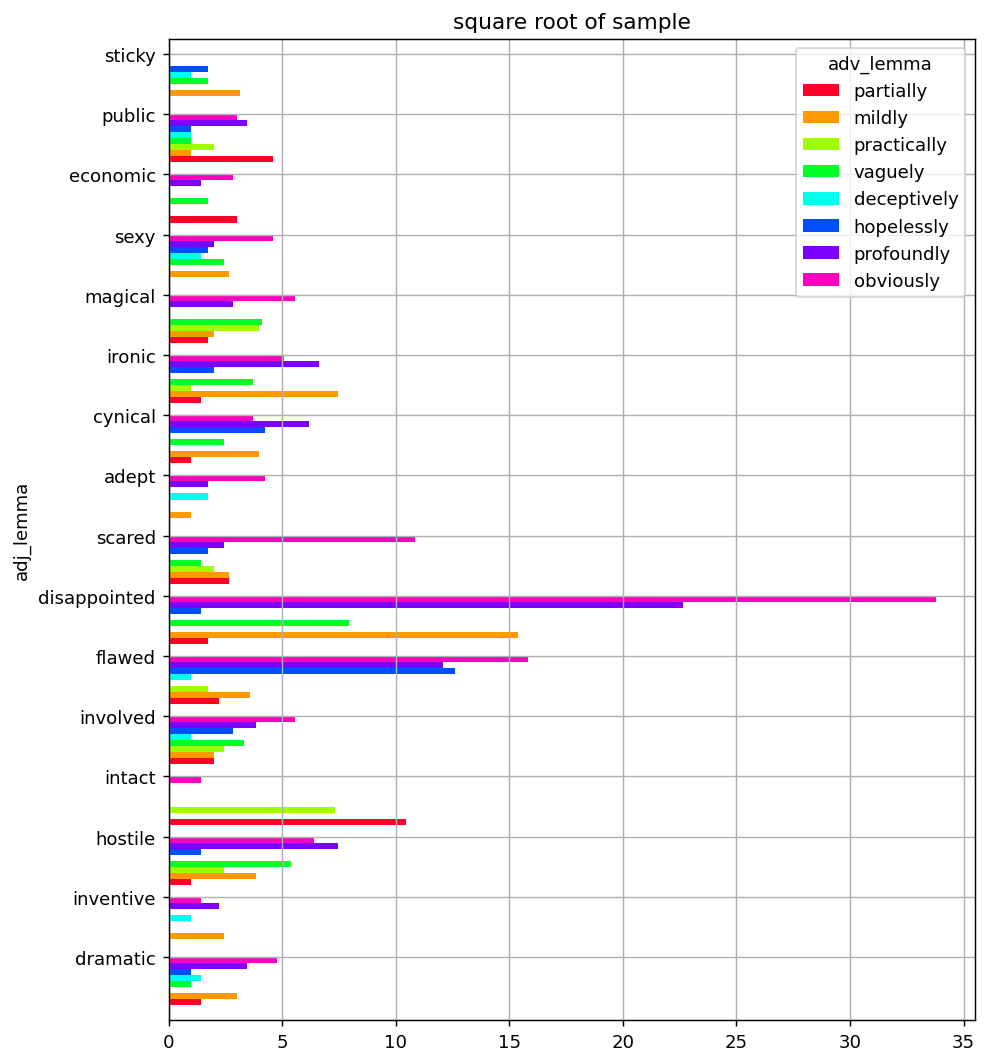

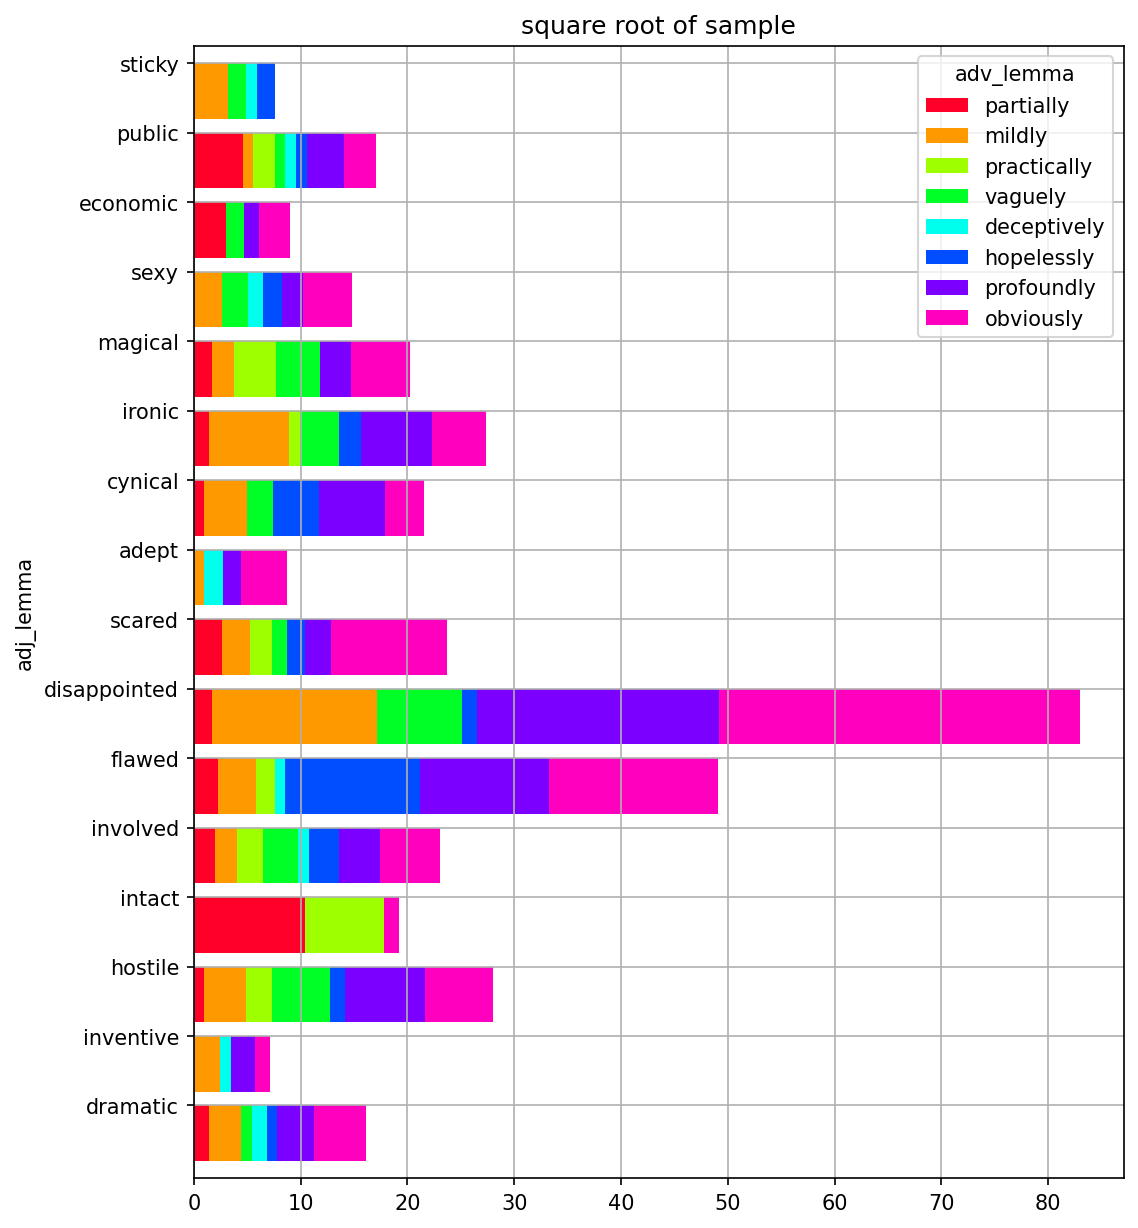

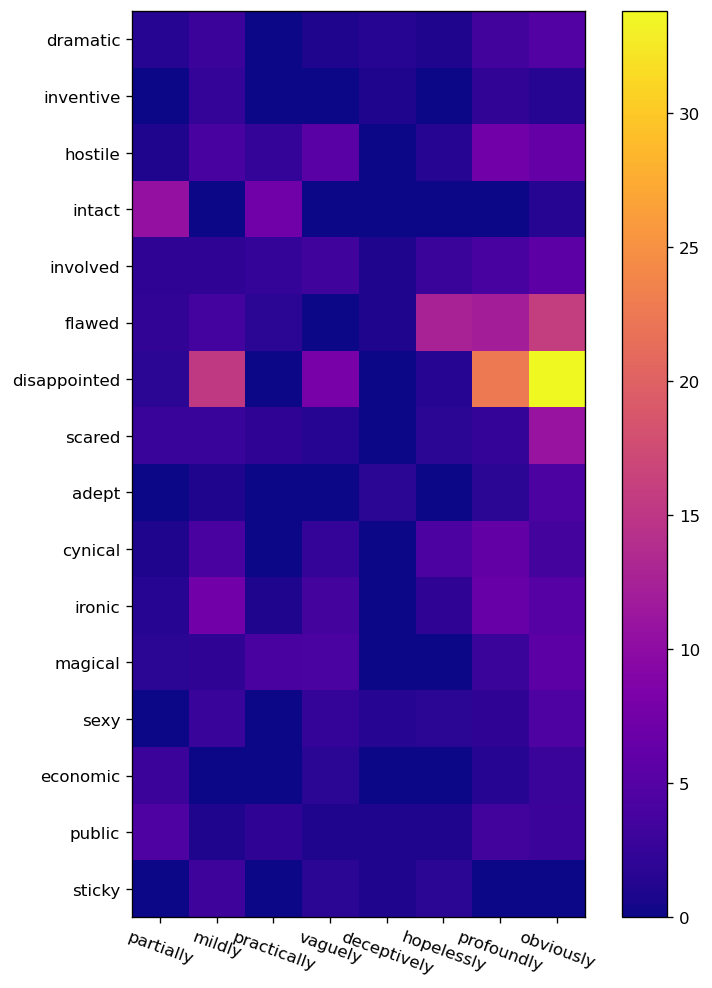

In [146]:
sqrt0_head, sqrt0_sample = sample_counts(
    frq0_sqrt, label='square root')

In [147]:
sqrt0_sample.round(1)

adv_lemma,partially,mildly,practically,vaguely,deceptively,hopelessly,profoundly,obviously
adj_lemma,,,,,,,,
dramatic,1.4,3.0,0.0,1.0,1.4,1.0,3.5,4.8
inventive,0.0,2.4,0.0,0.0,1.0,0.0,2.2,1.4
hostile,1.0,3.9,2.4,5.4,0.0,1.4,7.5,6.4
intact,10.4,0.0,7.3,0.0,0.0,0.0,0.0,1.4
involved,2.0,2.0,2.4,3.3,1.0,2.8,3.9,5.6
flawed,2.2,3.6,1.7,0.0,1.0,12.6,12.1,15.8
disappointed,1.7,15.4,0.0,7.9,0.0,1.4,22.6,33.8
scared,2.6,2.6,2.0,1.4,0.0,1.7,2.4,10.9
adept,0.0,1.0,0.0,0.0,1.7,0.0,1.7,4.2


 ### Log 10

 Data can also be transformed by taking the log, but if there are zeros in the data, some constant must be uniformly added first.

 `+1` is recommended along with log base 10, because:
 1. with log base 10, the transformed data is easier to interpret without backtransforming. e.g. a log value of *2.xx* clearly corresponds to an original value between `100` ($10^2$) and `1000` ($10^3$).
 2. if using base 10 for this reason, applying `+1` has the nice effect of keeping the zero cells at zero in the transformed data: $0+1=1$ and $log_{10}(1)=0$

In [148]:
frq_log10 = transform_counts(frq_table, method='log10')
frq_log10.round(2)

adv_lemma,very,more,most,so,not,as,too,really,much,pretty,...,resoundingly,athletically,questionably,inescapably,slyly,second-most,bracingly,deservedly,scandalously,urgently
adj_lemma,,,,,,,,,,,,,,,,,,,,,
good,5.81,4.32,3.77,5.17,5.15,5.40,4.77,5.41,5.46,5.38,...,1.11,0.7,1.04,0.30,0.7,0.00,0.48,0.78,1.04,0.48
many,4.33,2.57,2.15,6.08,4.77,5.64,5.65,2.71,2.33,1.74,...,0.00,0.0,0.30,0.00,0.0,0.00,0.00,0.00,0.00,0.00
important,5.55,5.49,5.87,5.02,4.38,5.01,4.11,4.86,3.26,3.82,...,0.00,0.3,0.60,0.78,0.0,2.05,0.00,0.00,0.00,2.08
much,4.62,2.01,1.36,5.79,4.90,5.55,5.76,3.49,2.46,4.76,...,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
likely,4.55,5.70,5.28,2.93,4.80,4.50,3.08,2.67,2.72,3.12,...,0.00,0.0,0.00,0.00,0.0,1.18,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
directional,1.97,2.35,1.72,0.95,1.57,0.85,1.11,0.60,0.48,0.85,...,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
anti-democratic,1.40,1.34,1.85,1.04,1.38,1.23,0.48,0.70,0.00,0.60,...,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
panicked,1.74,2.20,1.51,1.98,0.95,1.46,1.82,1.23,0.60,1.20,...,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


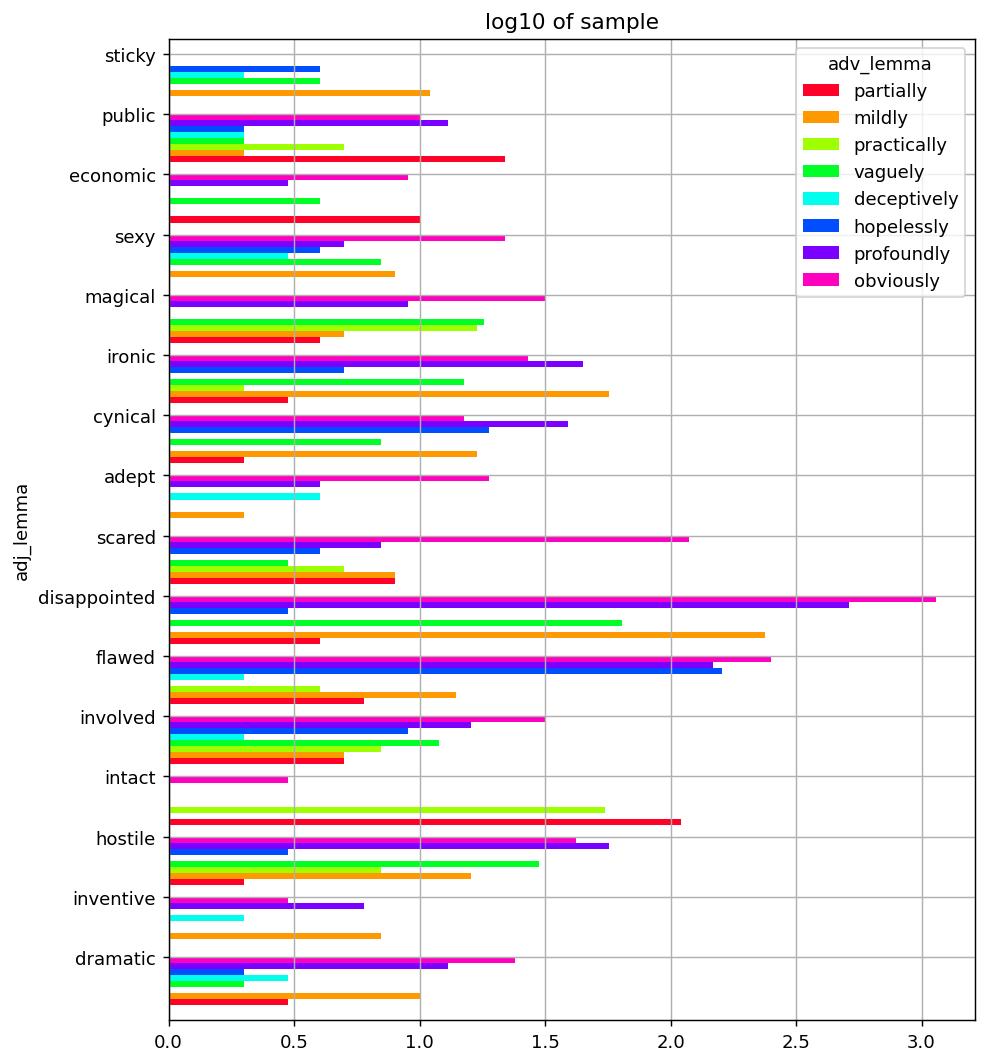

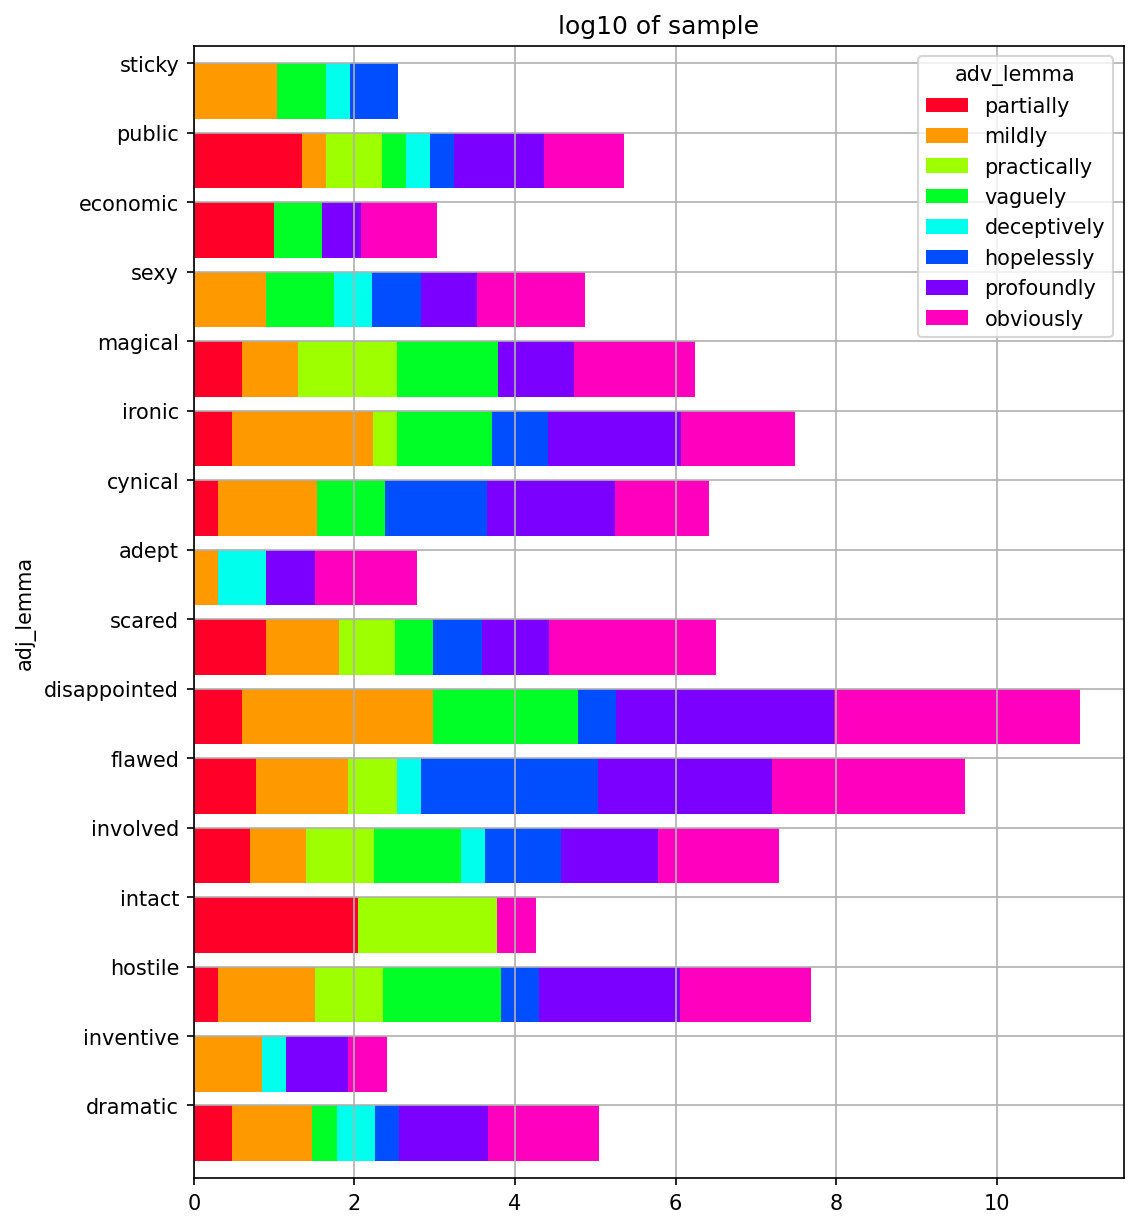

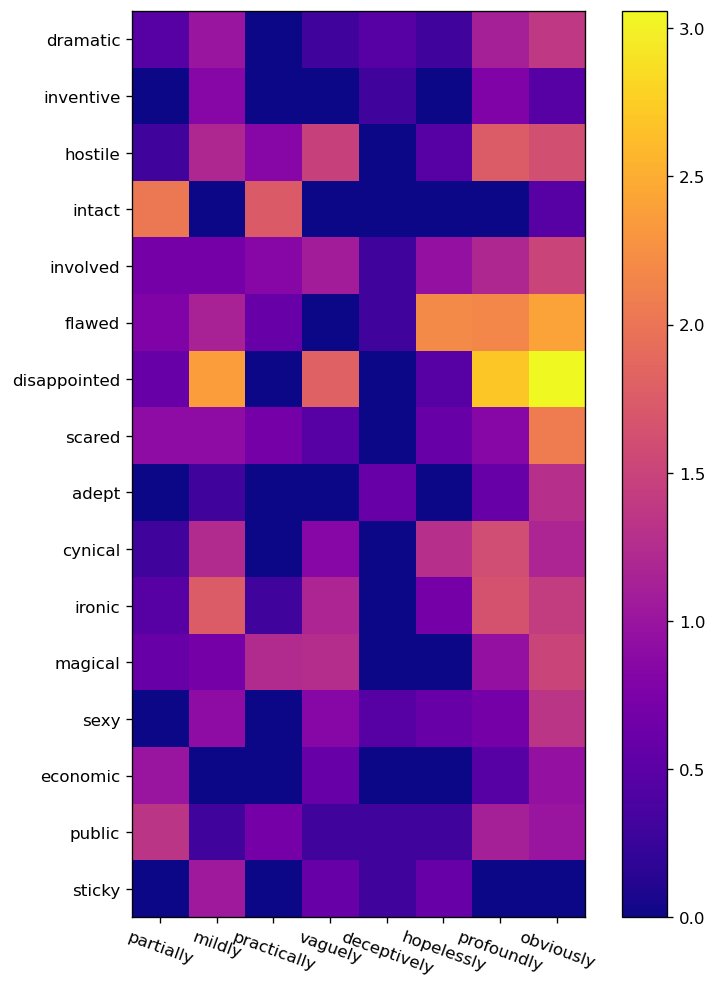

In [149]:
log10_head, log10_sample = sample_counts(
    frq_log10, label='log10', 
    rows=sqrt0_sample.index, 
    columns=sqrt0_sample.columns)

In [150]:
log10_sample.round(2)

adv_lemma,partially,mildly,practically,vaguely,deceptively,hopelessly,profoundly,obviously
adj_lemma,,,,,,,,
dramatic,0.48,1.00,0.00,0.30,0.48,0.30,1.11,1.38
inventive,0.00,0.85,0.00,0.00,0.30,0.00,0.78,0.48
hostile,0.30,1.20,0.85,1.48,0.00,0.48,1.76,1.62
intact,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.48
involved,0.70,0.70,0.85,1.08,0.30,0.95,1.20,1.51
flawed,0.78,1.15,0.60,0.00,0.30,2.20,2.17,2.40
disappointed,0.60,2.38,0.00,1.81,0.00,0.48,2.71,3.06
scared,0.90,0.90,0.70,0.48,0.00,0.60,0.85,2.08
adept,0.00,0.30,0.00,0.00,0.60,0.00,0.60,1.28


In [151]:
_enhance_descrip(frq_log10)

,count,mean,std,min,25%,50%,75%,max,total,var_coeff,range,IQ_range,upper_fence,lower_fence,plus1_geo_mean,plus1_har_mean
adv_lemma,,,,,,,,,,,,,,,,
very,3829,2.2,1.0,0,1.7,2.2,2.8,5.8,8591.2,0.4,5.8,1.2,4.6,-0.1,3.1,2.9
more,3829,2.6,0.8,0,2.0,2.5,3.1,5.7,9805.4,0.3,5.7,1.0,4.6,0.5,3.5,3.4
most,3829,2.2,0.9,0,1.6,2.2,2.8,5.9,8460.6,0.4,5.9,1.2,4.5,-0.1,3.1,2.9
so,3829,2.1,0.9,0,1.5,2.1,2.6,6.1,7954.4,0.4,6.1,1.0,4.2,-0.0,2.9,2.8
not,3829,2.0,0.9,0,1.4,1.9,2.5,5.7,7577.0,0.5,5.7,1.1,4.2,-0.2,2.8,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
second-most,3829,0.0,0.1,0,0.0,0.0,0.0,2.2,65.9,7.0,2.2,0.0,0.0,0.0,1.0,1.0
bracingly,3829,0.0,0.1,0,0.0,0.0,0.0,1.9,144.3,3.8,1.9,0.0,0.0,0.0,1.0,1.0
deservedly,3829,0.0,0.1,0,0.0,0.0,0.0,2.3,104.6,4.6,2.3,0.0,0.0,0.0,1.0,1.0


 > `+1` smoothing should not have a huge effect on the square root, however, it may be better to keep things consistent for comparison with log base 10 transformations.

In [152]:
_enhance_descrip(frq0_sqrt).round(1).median()

count             3829.0
mean                 0.3
std                  1.0
min                  0.0
25%                  0.0
50%                  0.0
75%                  0.0
max                 26.0
total             1055.4
var_coeff            3.3
range               26.0
IQ_range             0.0
upper_fence          0.0
lower_fence          0.0
plus1_geo_mean       1.2
plus1_har_mean       1.1
dtype: float64

In [153]:
frq1_sqrt = transform_counts(frq_table, plus1=True)
_enhance_descrip(frq1_sqrt).round(1).median()

count             3829.0
mean                 1.2
std                  0.8
min                  1.0
25%                  1.0
50%                  1.0
75%                  1.0
max                 26.0
total             4466.7
var_coeff            0.7
range               25.0
IQ_range             0.0
upper_fence          1.0
lower_fence          1.0
plus1_geo_mean       2.1
plus1_har_mean       2.1
dtype: float64

In [154]:
_enhance_descrip(frq1_sqrt)

,count,mean,std,min,25%,50%,75%,max,total,var_coeff,range,IQ_range,upper_fence,lower_fence,plus1_geo_mean,plus1_har_mean
adv_lemma,,,,,,,,,,,,,,,,
very,3829,25.7,43.8,1,6.8,12.6,26.3,802.7,98399.7,1.7,801.7,19.5,55.6,-22.5,14.9,9.6
more,3829,30.1,39.1,1,10.5,18.1,33.6,705.9,115137.7,1.3,704.9,23.1,68.2,-24.2,20.5,14.6
most,3829,22.8,38.1,1,6.4,12.3,24.6,864.2,87332.4,1.7,863.2,18.2,51.9,-20.9,14.3,9.7
so,3829,18.8,33.7,1,5.9,10.8,19.7,1091.4,71865.4,1.8,1090.4,13.8,40.4,-14.8,12.4,8.8
not,3829,18.1,33.4,1,5.1,9.3,18.1,740.8,69130.2,1.9,739.8,13.0,37.6,-14.4,11.3,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
second-most,3829,1.0,0.4,1,1.0,1.0,1.0,12.8,3974.4,0.4,11.8,0.0,1.0,1.0,2.0,2.0
bracingly,3829,1.1,0.3,1,1.0,1.0,1.0,8.4,4077.0,0.3,7.4,0.0,1.0,1.0,2.1,2.0
deservedly,3829,1.0,0.4,1,1.0,1.0,1.0,13.9,4018.6,0.3,12.9,0.0,1.0,1.0,2.0,2.0


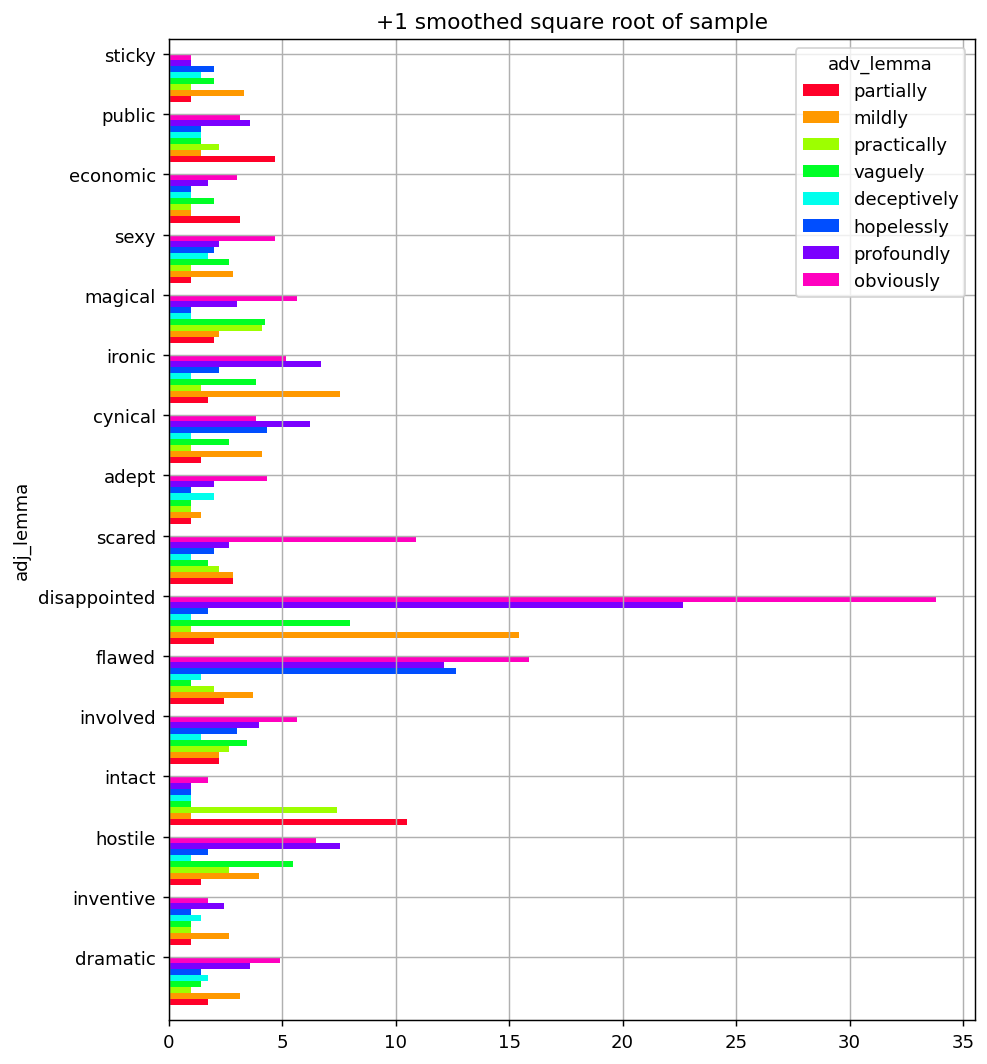

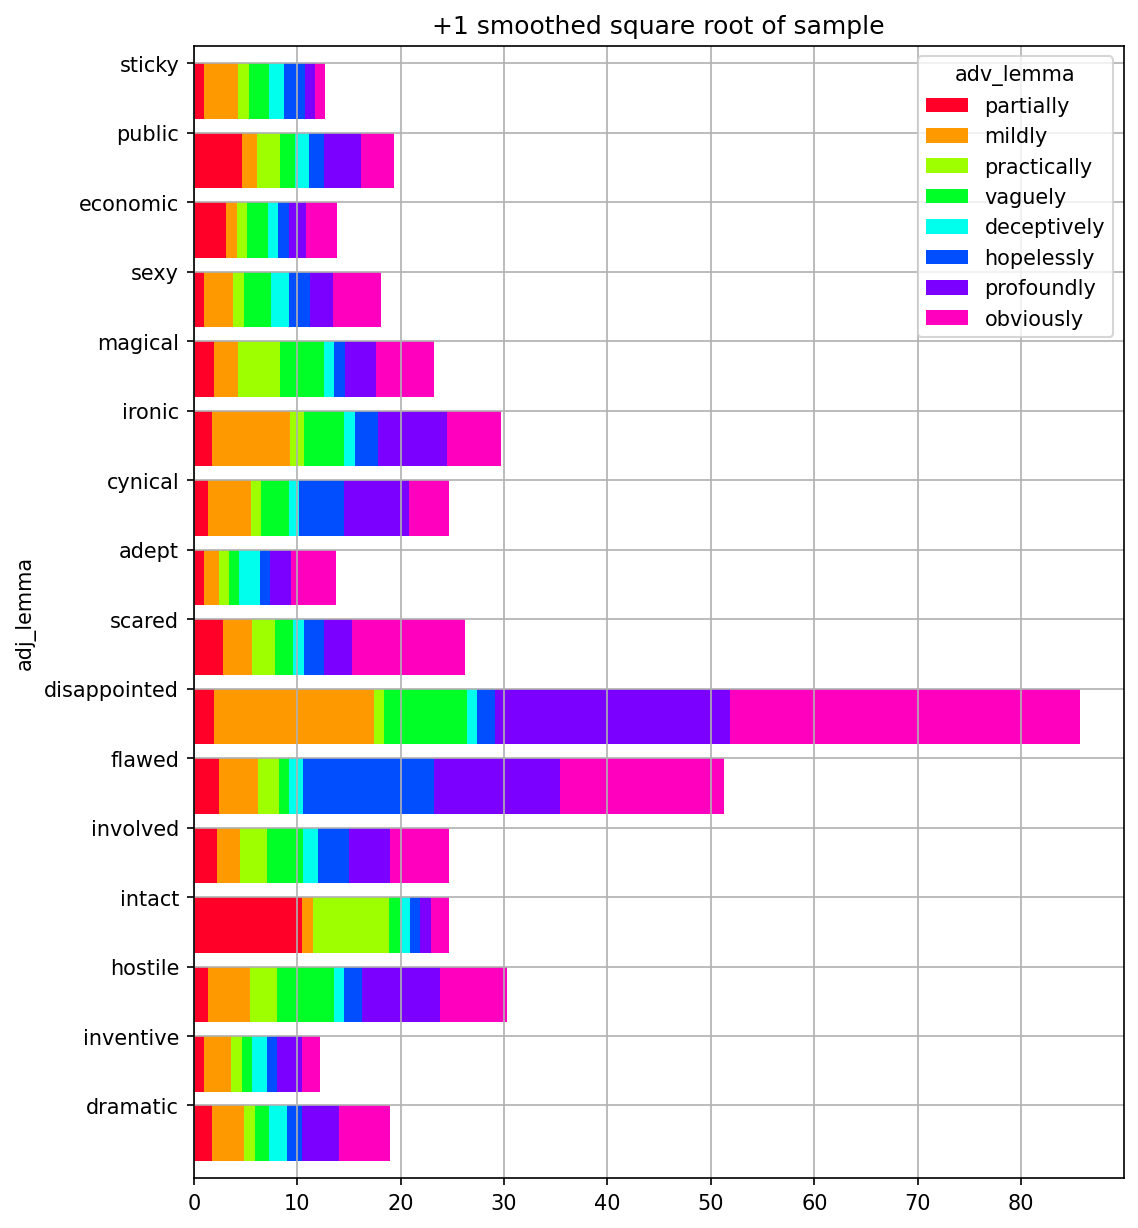

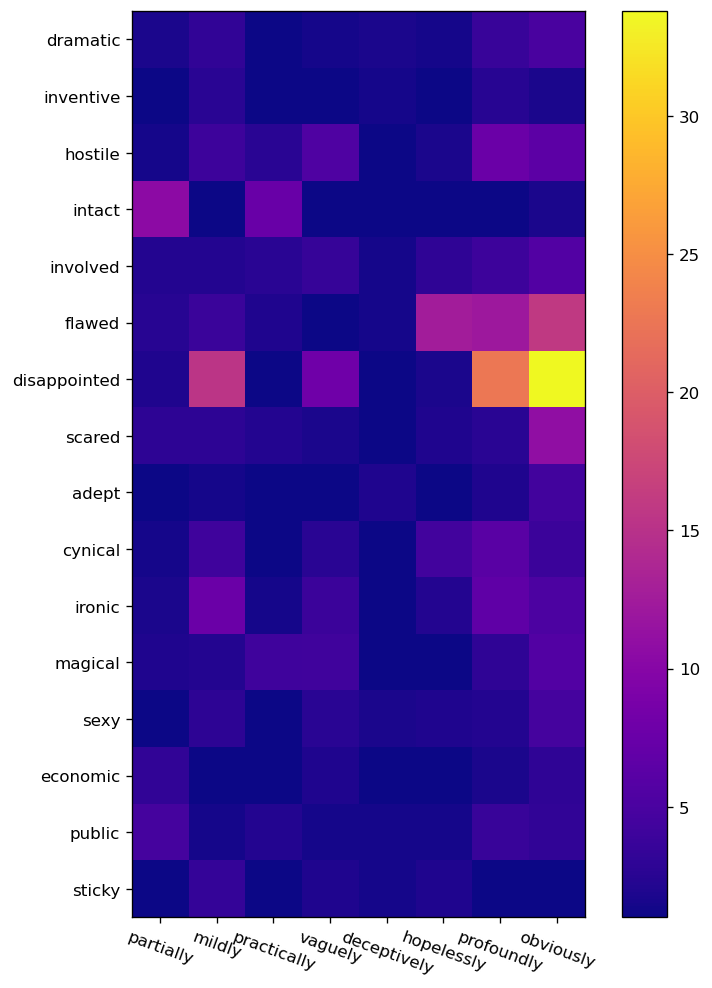

In [155]:
add1_sqrt_head, add1_sqrt_sample = sample_counts(
    frq1_sqrt, label='+1 smoothed square root', rows=sqrt0_sample.index, columns=sqrt0_sample.columns)

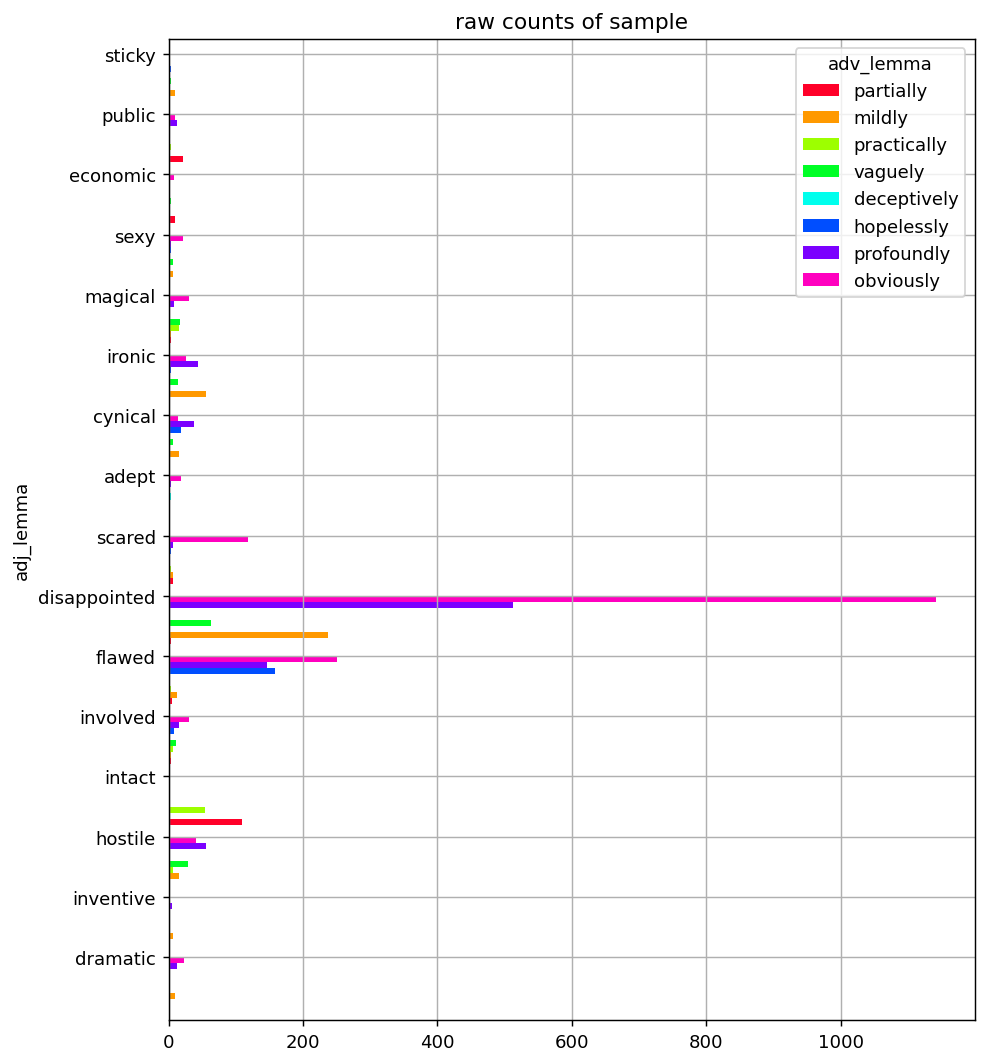

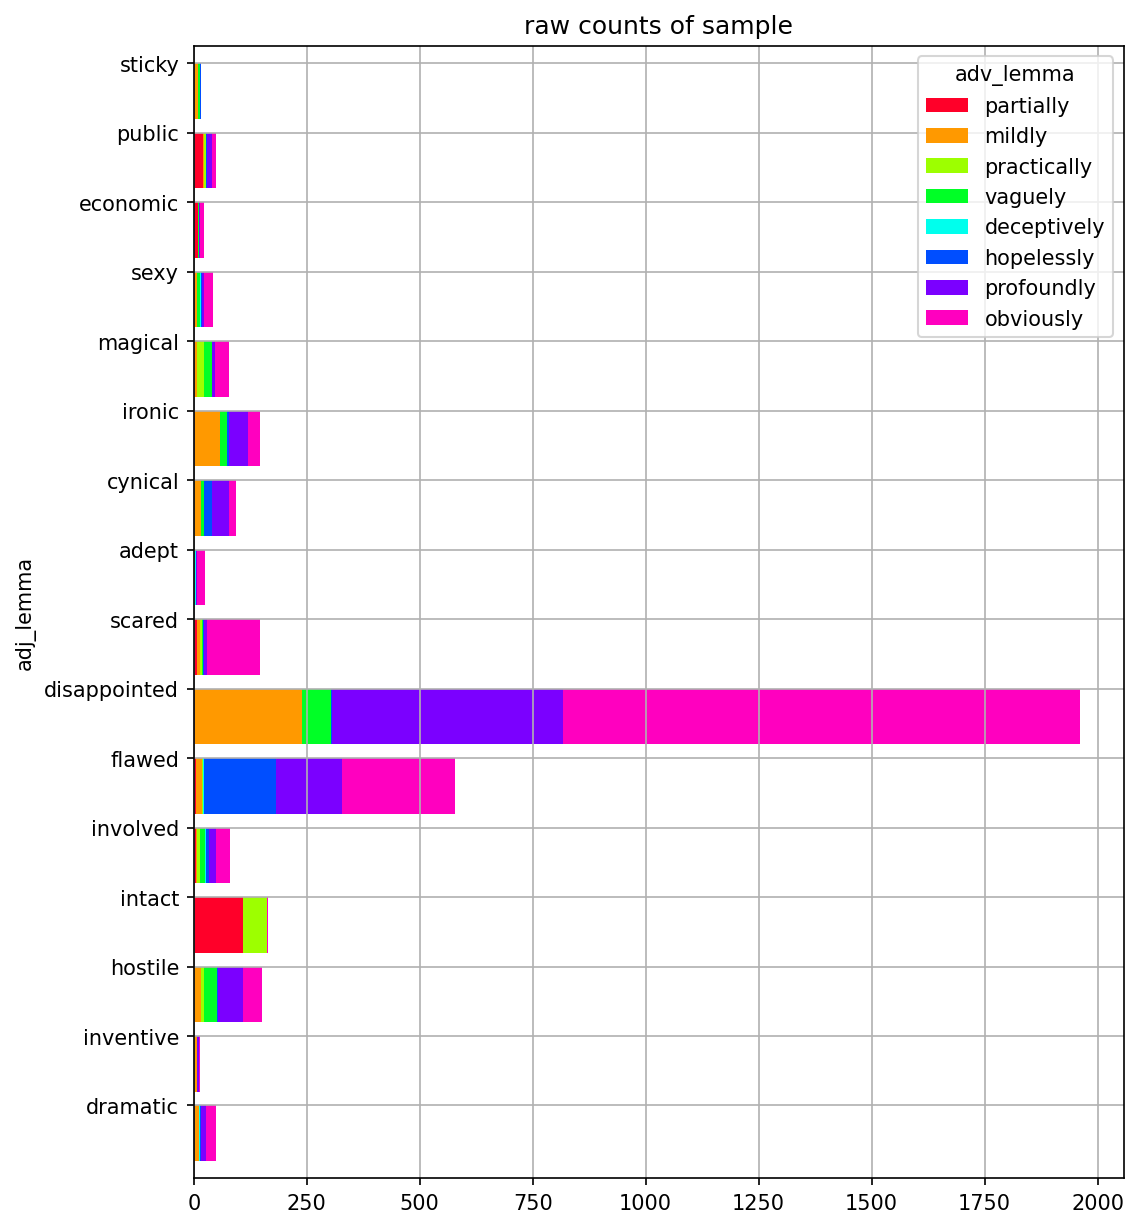

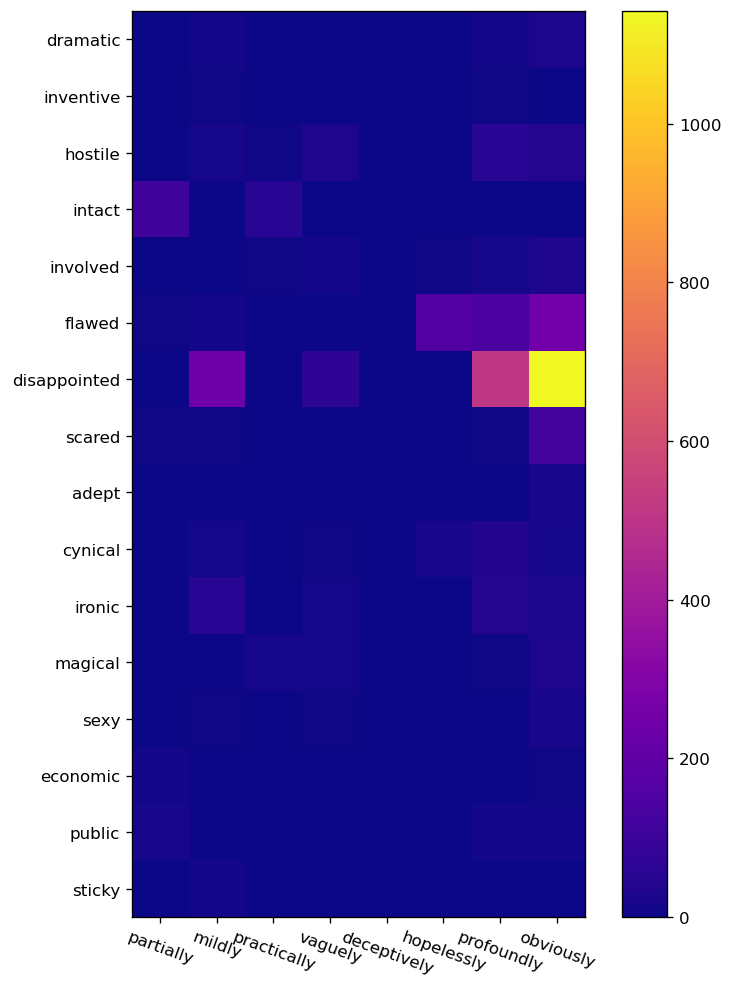

In [156]:
raw_head, raw_sample = sample_counts(
    frq_raw, label='raw counts', rows=sqrt0_sample.index, columns=sqrt0_sample.columns)

In [157]:
raw_sample

adv_lemma,partially,mildly,practically,vaguely,deceptively,hopelessly,profoundly,obviously
adj_lemma,,,,,,,,
dramatic,2,9,0,1,2,1,12,23
inventive,0,6,0,0,1,0,5,2
hostile,1,15,6,29,0,2,56,41
intact,109,0,54,0,0,0,0,2
involved,4,4,6,11,1,8,15,31
flawed,5,13,3,0,1,159,146,251
disappointed,3,237,0,63,0,2,513,1142
scared,7,7,4,2,0,3,6,118
adept,0,1,0,0,3,0,3,18


## Takeaways

1. Clearly, the transformed frequencies allow for more patterns to be visible
   by mitigating the huge disparity between the most and least frequent elements. 
   Even with a filtering threshold of `877` tokens/lemma, the raw count differences
   between individual lemma combinations/bigrams is still huge, ranging from `0` to `1,191,059`

In [158]:
def show_max(frq_df): 
    max_count = frq_df.max().max()
    print(frq_df.loc[frq_df.max(axis=1) == max_count,
        frq_df.max() == max_count].to_markdown(floatfmt=',.0f'))
    
show_max(frq_raw)

| adj_lemma   |        so |
|:------------|----------:|
| many        | 1,191,059 |


2. I think the square root transformation is better suited to this data landscape. 
   Both transformations reduce the range of values to make them easier to conceptualize/visualize
   and find patterns, but the log transformed data goes *too* far, I feel. 

   The initial range of `1.2 million` is compressed into `1.1 thousand` with the square root, 
   but the log base 10 transformation compresses this into a range of `6`. At this end
   of the spectrum, the patterns just get lost for the opposite reason:
   Rather than the counts being *too **far***, they are *too **close***

In [159]:
print('square root (with raw counts as input)')
show_max(frq0_sqrt)
print('\n(with +1 smoothed counts as input)')
show_max(frq1_sqrt)
print('\nLog base 10')
show_max(frq_log10)

square root (with raw counts as input)
| adj_lemma   |    so |
|:------------|------:|
| many        | 1,091 |

(with +1 smoothed counts as input)
| adj_lemma   |    so |
|:------------|------:|
| many        | 1,091 |

Log base 10
| adj_lemma   |   so |
|:------------|-----:|
| many        |    6 |


   * the binary log would be better than base 10, with a compressed range of `20` at least, 
     instead of `6`, but that's still a huge difference from the initial range.

In [160]:
show_max(transform_counts(frq_table, method='log2'))
frq_log2 = transform_counts(frq_raw, method='log2')
_enhance_descrip(frq_log2)


| adj_lemma   |   so |
|:------------|-----:|
| many        |   20 |


,count,mean,std,min,25%,50%,75%,max,total,var_coeff,range,IQ_range,upper_fence,lower_fence,plus1_geo_mean,plus1_har_mean
adv_lemma,,,,,,,,,,,,,,,,
very,3829,7.5,3.2,0,5.5,7.3,9.4,19.3,28539.3,0.4,19.3,3.9,15.3,-0.3,7.7,6.4
more,3829,8.5,2.7,0,6.8,8.4,10.1,18.9,32572.8,0.3,18.9,3.4,15.2,1.7,9.1,8.4
most,3829,7.3,3.0,0,5.4,7.2,9.2,19.5,28105.4,0.4,19.5,3.9,15.1,-0.5,7.7,6.6
so,3829,6.9,2.9,0,5.1,6.9,8.6,20.2,26423.9,0.4,20.2,3.5,13.8,-0.1,7.3,6.3
not,3829,6.6,3.0,0,4.7,6.4,8.4,19.1,25170.4,0.5,19.1,3.7,13.8,-0.8,6.8,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
second-most,3829,0.1,0.4,0,0.0,0.0,0.0,7.4,219.0,7.0,7.4,0.0,0.0,0.0,1.0,1.0
bracingly,3829,0.1,0.5,0,0.0,0.0,0.0,6.1,479.3,3.8,6.1,0.0,0.0,0.0,1.1,1.0
deservedly,3829,0.1,0.4,0,0.0,0.0,0.0,7.6,347.6,4.6,7.6,0.0,0.0,0.0,1.1,1.0


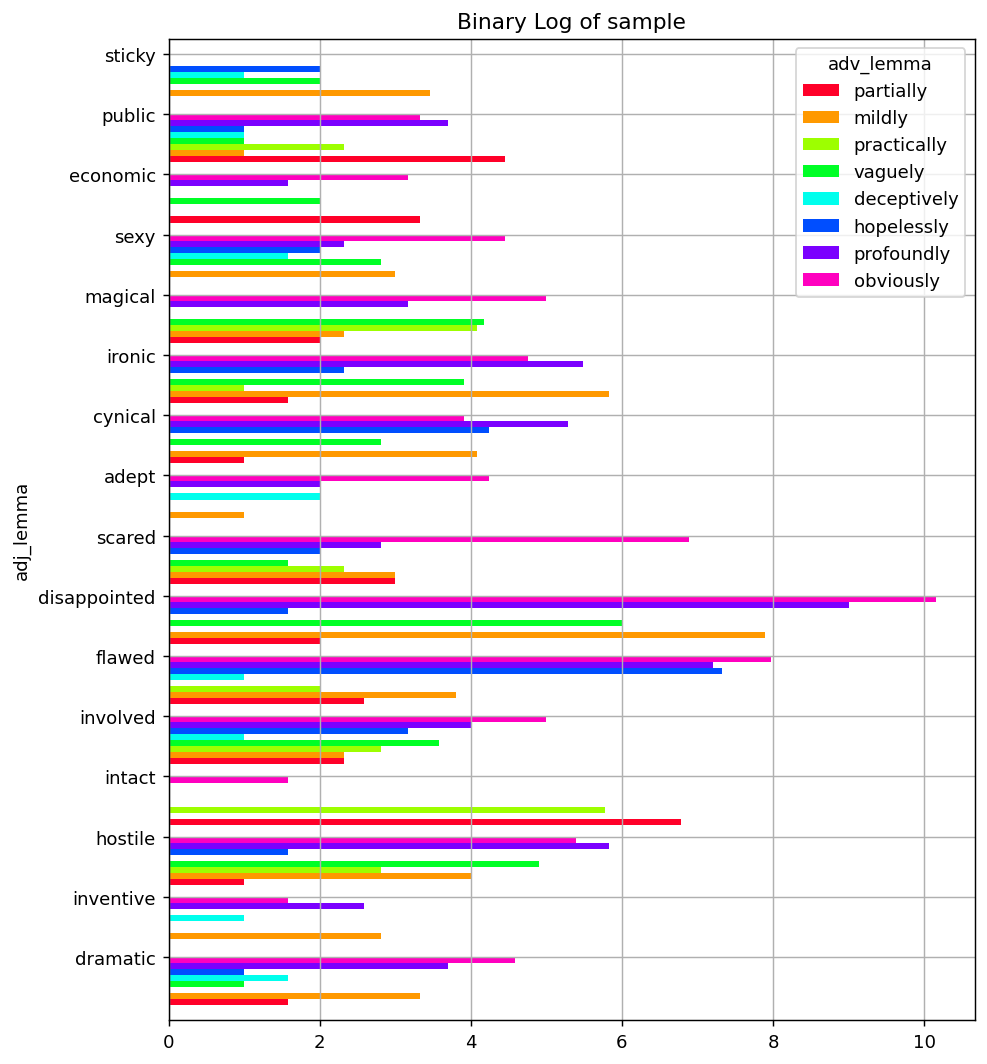

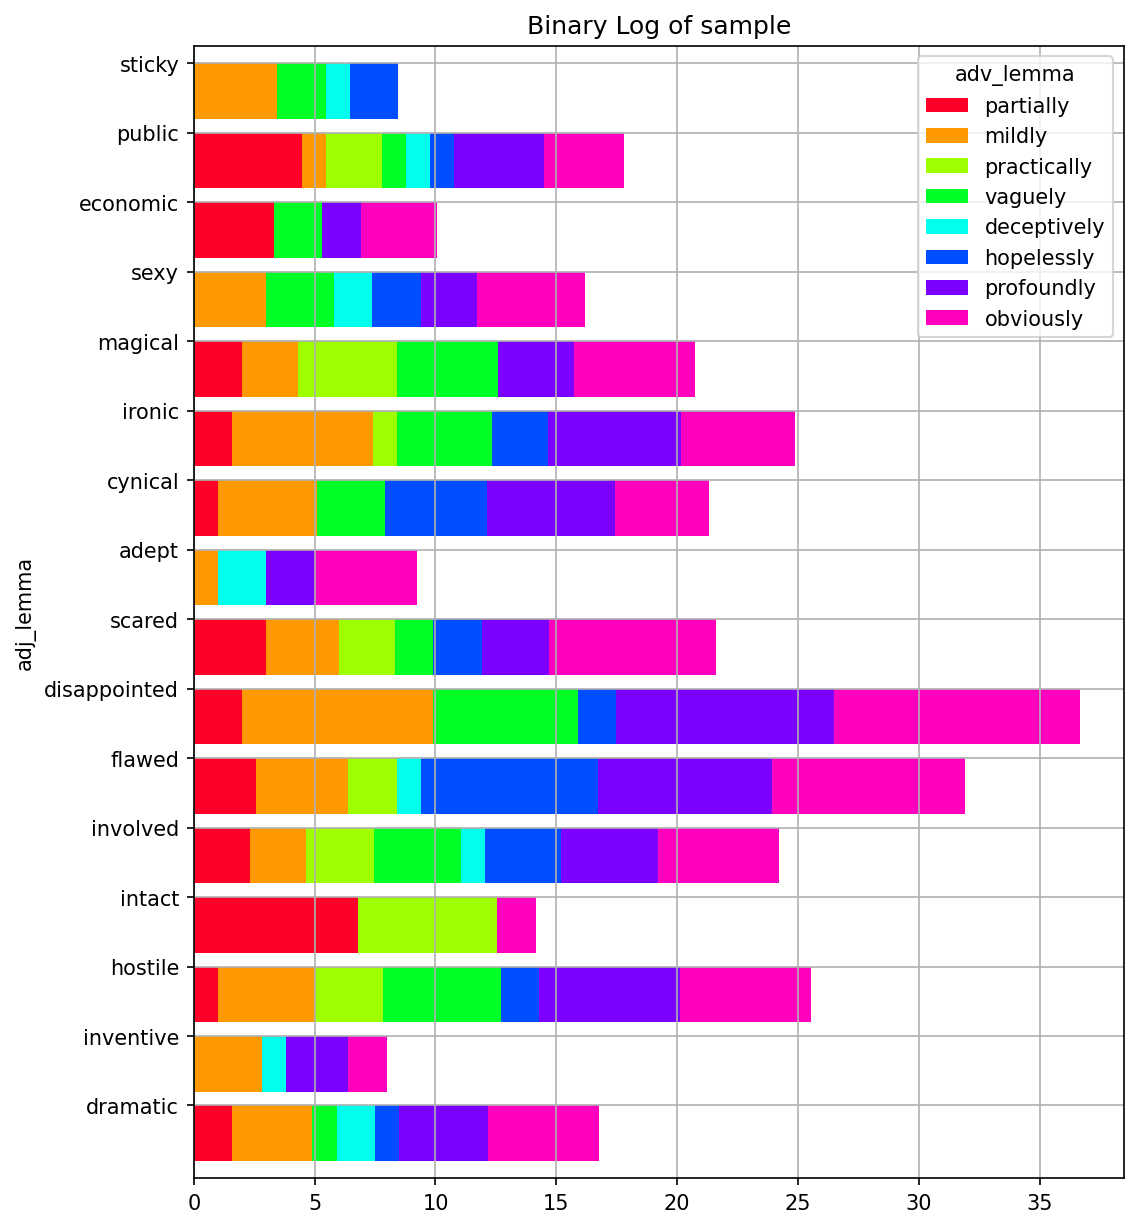

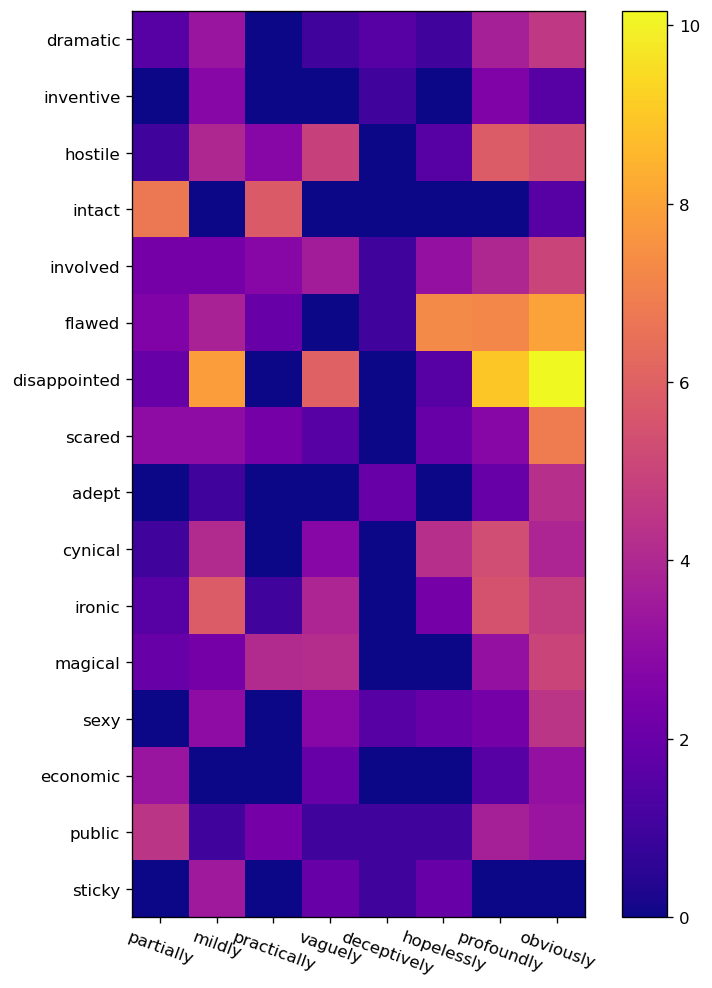

In [161]:
log2_head, log2_sample = sample_counts(frq_log2, label='Binary Log', 
                                       rows=sqrt0_sample.index, 
                                       columns=sqrt0_sample.columns)

In [162]:
log2_sample.round(2)

adv_lemma,partially,mildly,practically,vaguely,deceptively,hopelessly,profoundly,obviously
adj_lemma,,,,,,,,
dramatic,1.58,3.32,0.00,1.00,1.58,1.00,3.70,4.58
inventive,0.00,2.81,0.00,0.00,1.00,0.00,2.58,1.58
hostile,1.00,4.00,2.81,4.91,0.00,1.58,5.83,5.39
intact,6.78,0.00,5.78,0.00,0.00,0.00,0.00,1.58
involved,2.32,2.32,2.81,3.58,1.00,3.17,4.00,5.00
flawed,2.58,3.81,2.00,0.00,1.00,7.32,7.20,7.98
disappointed,2.00,7.89,0.00,6.00,0.00,1.58,9.01,10.16
scared,3.00,3.00,2.32,1.58,0.00,2.00,2.81,6.89
adept,0.00,1.00,0.00,0.00,2.00,0.00,2.00,4.25


In [163]:
print(f'{input_csv.parent}/\n', 
      f'  ↪  {input_csv.stem}({input_csv.suffix})')

/share/compling/projects/sanpi/results/freq_out/
   ↪  all-frq_thresh877.35f(.csv)


In [164]:
transform_dir = input_csv.parent.with_name('transformed')
if not transform_dir.is_dir(): 
    transform_dir.mkdir()

sqrtpath=transform_dir.joinpath(f'sqrt_{input_csv.name}')
log2path=transform_dir.joinpath(f'log2_{input_csv.name}')

print(f'{transform_dir}/',
      f'  ↪  {sqrtpath.stem}({sqrtpath.suffix})', 
      f'  ↪  {log2path.stem}({log2path.suffix})', 
      sep='\n')

/share/compling/projects/sanpi/results/transformed/
  ↪  sqrt_all-frq_thresh877.35f(.csv)
  ↪  log2_all-frq_thresh877.35f(.csv)


In [166]:
if not sqrtpath.is_file(): 
    frq1_sqrt.to_csv(sqrtpath)
if not log2path.is_file(): 
    frq1_sqrt.to_csv(log2path)